In [1]:
#Import the Required Libraries

import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection as model_selection
import sklearn.tree
import sklearn.neighbors
from sklearn.preprocessing import StandardScaler

In [2]:
## Read in the data from the wine file display for verification

winedf = pd.read_csv("Data/winequality-white.csv",delimiter= ";")
winedf.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
## Set up target value depending on the quality value

#if quality in range 0,5 then 0 else 1, add target column to dataframe
def target_set_value(row):
    if row['quality'] >= 0 and row['quality'] <=5:
        return 0
    else:
        return 1
winedf['Target'] = winedf.apply(target_set_value,axis = 1)
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
#Write the imbalance ratio

#get the number of each class
PositiveClassCount = winedf.loc[winedf.Target == 1,'Target'].count()
NegativeClassCount = winedf.loc[winedf.Target == 0,'Target'].count()
TotalClassCount = PositiveClassCount+NegativeClassCount
print(f"Positive Case Count [Target = 1] = {PositiveClassCount}")
print(f"Negative Case Count [Target = 0] = {NegativeClassCount}")
print(f"Total Case Count = {PositiveClassCount+NegativeClassCount}")
print(f"Imbalance Ratio of DataSet ([Positive Case Count]/[Negative Case Count]): = {round(PositiveClassCount/NegativeClassCount,4)}")
print(f"Percent Positive Cases: {round(PositiveClassCount/TotalClassCount,3)*100}")
print(f"Percent Negative Cases: {round(NegativeClassCount/TotalClassCount,3)*100}")

Positive Case Count [Target = 1] = 3258
Negative Case Count [Target = 0] = 1640
Total Case Count = 4898
Imbalance Ratio of DataSet ([Positive Case Count]/[Negative Case Count]): = 1.9866
Percent Positive Cases: 66.5
Percent Negative Cases: 33.5


In [5]:
#Split the data into Train, Validation, Test sets (60,20,20) data split

#Set up the input values of the system, all columns of the data frame except the quality and target values
Xvalues = winedf.drop(columns=['quality','Target'])
#Set up the desired output values of the systme, the Target value column of the data frame
Yvalues = winedf.Target

#Set Up random state value to be able to reproduce the results
RandomState = 13

#Split the Xvalues and Yvalues into the desired subsets of the datapool
x_train, x_test, y_train, y_test =  model_selection.train_test_split(Xvalues,Yvalues,test_size=0.2,random_state=RandomState)

#Split X_Train values again to produce the validation set for the datapool
x_train, x_val, y_train, y_val = model_selection.train_test_split(x_train,y_train,test_size=0.25,random_state=RandomState)

#display size of each portion
print(f"Number of Train Instances: {len(x_train)}")
print(f"Number of Validation Instances: {len(x_val)}")
print(f"Number of Test Instances: {len(x_test)}")

Number of Train Instances: 2938
Number of Validation Instances: 980
Number of Test Instances: 980


In [6]:
# Do Z Normalization on the Training, Validation, and Testing Data sets, but not to the classification classes
#define the function to be used
def Z_Normalization(arr):
    scaler = StandardScaler()
    scaler.fit(arr)
    scaler.mean_
    new_arr = scaler.transform(arr)
    return new_arr
#Train Data
X_train_z = Z_Normalization(x_train)
Y_train_z = y_train
#Validation data
X_val_z = Z_Normalization(x_val)
Y_val_z = y_val
#Test data
X_test_z = Z_Normalization(x_test)
Y_test_z = y_test

In [7]:
# Sklearn KNN model
def KNN_model(x,y,N,x_val,y_val,display):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=N)
    model.fit(x,y)
    #Test model on validation data
    sklearn.neighbors.KNeighborsClassifier(n_neighbors = N)
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
# KNN using 1 neighbor
KNN1 = KNN_model(X_train_z,Y_train_z,1,X_val_z,Y_val_z,False)
# KNN using 3 neighbors
KNN3 = KNN_model(X_train_z,Y_train_z,3,X_val_z,Y_val_z,False)
# KNN using 5 neighbors
KNN5 = KNN_model(X_train_z,Y_train_z,5,X_val_z,Y_val_z,False)
#storing all the performances from the KNN models
results_KNN = pd.DataFrame([KNN1,KNN3,KNN5],['1NN','3NN','5NN'],['Accuracy','Precision','Recall','F1'])
results_KNN.head()

,Accuracy,Precision,Recall,F1
1NN,0.791837,0.848855,0.841150,0.844985
3NN,0.756122,0.809384,0.835098,0.822040
5NN,0.754082,0.810651,0.829047,0.819746


In [8]:
#SVM model
def SVM_model(x,y,kernaltype,x_val,y_val,display):
    model = sklearn.svm.SVC(kernel=kernaltype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#SVM model using rbf
SVM_rbf_model = SVM_model(X_train_z,Y_train_z,'rbf',X_val_z,Y_val_z,False)
#SVM model using linear
SVM_linear_model = SVM_model(X_train_z,Y_train_z,'linear',X_val_z,Y_val_z,False)
#SVM model using poly
SVM_poly_model = SVM_model(X_train_z,Y_train_z,'poly',X_val_z,Y_val_z,False)
#storing all the performances from the SVM models
results_SVM = pd.DataFrame([SVM_rbf_model,SVM_linear_model,SVM_poly_model],['SVM_rbf','SVM_linear','SVM_poly'],['Accuracy','Precision','Recall','F1'])
results_SVM.head()

,Accuracy,Precision,Recall,F1
SVM_rbf,0.756122,0.787466,0.874433,0.828674
SVM_linear,0.729592,0.764000,0.866868,0.812190
SVM_poly,0.729592,0.740291,0.922844,0.821549


In [9]:
#Decision Tree Model
def DecisionTree_model(x,y,classtype,x_val,y_val,display):
    model = sklearn.tree.DecisionTreeClassifier(criterion=classtype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#Decision Tree Model using gini
DecisionTree_gini_model = DecisionTree_model(X_train_z,Y_train_z,'gini',X_val_z,Y_val_z,False)
#Decision Tree Model using entropy
DecisionTree_entropy_model = DecisionTree_model(X_train_z,Y_train_z,'entropy',X_val_z,Y_val_z,False)
#storing all the performances from the Decision Tree models
results_DecisionTree = pd.DataFrame([DecisionTree_gini_model,DecisionTree_entropy_model],['DT_gini','DT_entropy'],['Accuracy','Precision','Recall','F1'])
results_DecisionTree.head()

,Accuracy,Precision,Recall,F1
DT_gini,0.707143,0.783333,0.782148,0.782740
DT_entropy,0.696939,0.769231,0.786687,0.777861


In [10]:
#Logistic Regression Model
def Logistic_Regression_model(x,y,penaltytype,solvertype,x_val,y_val,display):
    model = sklearn.linear_model.LogisticRegression(penalty=penaltytype,solver=solvertype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    #evaluate the performance of the model
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    #get the confusion matrix information
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#Decision Tree Model using gini
Logistic_Regression_l1_model = Logistic_Regression_model(X_train_z,Y_train_z,'l1','liblinear',X_val_z,Y_val_z,False)
#Decision Tree Model using entropy
Logistic_Regression_l2_model = Logistic_Regression_model(X_train_z,Y_train_z,'l2','lbfgs',X_val_z,Y_val_z,False)
#storing all the performances from the Decision Tree models
results_Logistic_Regression = pd.DataFrame([Logistic_Regression_l1_model,Logistic_Regression_l2_model],['LogRegr_l1','LogRegr_l2'],['Accuracy','Precision','Recall','F1'])
results_Logistic_Regression.head()

,Accuracy,Precision,Recall,F1
LogRegr_l1,0.722449,0.763908,0.85174,0.805436
LogRegr_l2,0.721429,0.762873,0.85174,0.804861


In [11]:
#Pool all results together into one table and display the table

#concat all the result dataframes together to one
Results_all_models = pd.concat([results_KNN,results_SVM,results_DecisionTree,results_Logistic_Regression],axis=0)
print("Full List of Results from Training:\n")
print(Results_all_models)
print(f"\n\n")
#sort the model from least to greatest F1 score value
Results_all_models_sorted = Results_all_models.sort_values(['F1'],ascending=[False])
print("Full List of Results from Training Sorted by F1 Value:\n")
print(Results_all_models_sorted)

Full List of Results from Training:

            Accuracy  Precision    Recall        F1
1NN         0.791837   0.848855  0.841150  0.844985
3NN         0.756122   0.809384  0.835098  0.822040
5NN         0.754082   0.810651  0.829047  0.819746
SVM_rbf     0.756122   0.787466  0.874433  0.828674
SVM_linear  0.729592   0.764000  0.866868  0.812190
SVM_poly    0.729592   0.740291  0.922844  0.821549
DT_gini     0.707143   0.783333  0.782148  0.782740
DT_entropy  0.696939   0.769231  0.786687  0.777861
LogRegr_l1  0.722449   0.763908  0.851740  0.805436
LogRegr_l2  0.721429   0.762873  0.851740  0.804861



Full List of Results from Training Sorted by F1 Value:

            Accuracy  Precision    Recall        F1
1NN         0.791837   0.848855  0.841150  0.844985
SVM_rbf     0.756122   0.787466  0.874433  0.828674
3NN         0.756122   0.809384  0.835098  0.822040
SVM_poly    0.729592   0.740291  0.922844  0.821549
5NN         0.754082   0.810651  0.829047  0.819746
SVM_linear  0.729592

Confusion Matrix Values
[[209 133]
 [ 98 540]]

Performance of the best network using the test data:

     Accuracy  Precision    Recall        F1
1NN  0.764286   0.802377  0.846395  0.823799

Confusion Matrix Values by Type:

True Positive (TP) = 540
True Negative (TN) = 209
False Positive (FP) = 133
False Negative (FN) = 98


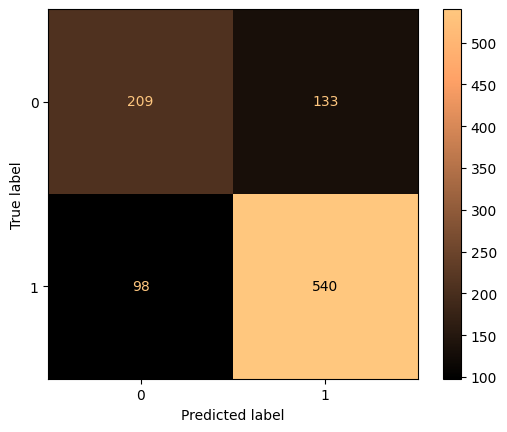

In [12]:
#Test the performance of the model on the highest performing F1 value model (KNN = 1NN)
#get the network again, give it the test data instead of validation data
def KNN_model_best(x,y,N,x_val,y_val,display):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=N)
    model.fit(x,y)
    #Test model on validation data
    sklearn.neighbors.KNeighborsClassifier(n_neighbors = N)
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    print("Confusion Matrix Values")
    print(cm)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot(cmap='copper')
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
# KNN using 1 neighbor
KNN1_bestmodel = KNN_model_best(X_train_z,Y_train_z,1,X_test_z,Y_test_z,True)
results_Best_model = pd.DataFrame([KNN1_bestmodel],['1NN'],['Accuracy','Precision','Recall','F1'])
print(f"\nPerformance of the best network using the test data:\n")
print(results_Best_model)
print(f"\nConfusion Matrix Values by Type:\n")
print(f"True Positive (TP) = 540")
print(f"True Negative (TN) = 209")
print(f"False Positive (FP) = 133")
print(f"False Negative (FN) = 98")

In [13]:
# Do Z Normalization on the Training, Validation, and Testing Data sets, but not to the classification classes
#define the function to be used
def Z_Normalization(arr):
    scaler = StandardScaler()
    scaler.fit(arr)
    scaler.mean_
    new_arr = scaler.transform(arr)
    return new_arr
#Train Data
X_train_z = Z_Normalization(x_train)
Y_train_z = y_train
#Validation data
X_val_z = Z_Normalization(x_val)
Y_val_z = y_val
#Test data
X_test_z = Z_Normalization(x_test)
Y_test_z = y_test

In [14]:
# Sklearn KNN model
def KNN_model(x,y,N,x_val,y_val,display):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=N)
    model.fit(x,y)
    #Test model on validation data
    sklearn.neighbors.KNeighborsClassifier(n_neighbors = N)
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
# KNN using 1 neighbor
KNN1 = KNN_model(X_train_z,Y_train_z,1,X_val_z,Y_val_z,False)
# KNN using 3 neighbors
KNN3 = KNN_model(X_train_z,Y_train_z,3,X_val_z,Y_val_z,False)
# KNN using 5 neighbors
KNN5 = KNN_model(X_train_z,Y_train_z,5,X_val_z,Y_val_z,False)
#storing all the performances from the KNN models
results_KNN = pd.DataFrame([KNN1,KNN3,KNN5],['1NN','3NN','5NN'],['Accuracy','Precision','Recall','F1'])
results_KNN.head()

,Accuracy,Precision,Recall,F1
1NN,0.791837,0.848855,0.841150,0.844985
3NN,0.756122,0.809384,0.835098,0.822040
5NN,0.754082,0.810651,0.829047,0.819746


In [15]:
#SVM model
def SVM_model(x,y,kernaltype,x_val,y_val,display):
    model = sklearn.svm.SVC(kernel=kernaltype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#SVM model using rbf
SVM_rbf_model = SVM_model(X_train_z,Y_train_z,'rbf',X_val_z,Y_val_z,False)
#SVM model using linear
SVM_linear_model = SVM_model(X_train_z,Y_train_z,'linear',X_val_z,Y_val_z,False)
#SVM model using poly
SVM_poly_model = SVM_model(X_train_z,Y_train_z,'poly',X_val_z,Y_val_z,False)
#storing all the performances from the SVM models
results_SVM = pd.DataFrame([SVM_rbf_model,SVM_linear_model,SVM_poly_model],['SVM_rbf','SVM_linear','SVM_poly'],['Accuracy','Precision','Recall','F1'])
results_SVM.head()

,Accuracy,Precision,Recall,F1
SVM_rbf,0.756122,0.787466,0.874433,0.828674
SVM_linear,0.729592,0.764000,0.866868,0.812190
SVM_poly,0.729592,0.740291,0.922844,0.821549


In [16]:
#Decision Tree Model
def DecisionTree_model(x,y,classtype,x_val,y_val,display):
    model = sklearn.tree.DecisionTreeClassifier(criterion=classtype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#Decision Tree Model using gini
DecisionTree_gini_model = DecisionTree_model(X_train_z,Y_train_z,'gini',X_val_z,Y_val_z,False)
#Decision Tree Model using entropy
DecisionTree_entropy_model = DecisionTree_model(X_train_z,Y_train_z,'entropy',X_val_z,Y_val_z,False)
#storing all the performances from the Decision Tree models
results_DecisionTree = pd.DataFrame([DecisionTree_gini_model,DecisionTree_entropy_model],['DT_gini','DT_entropy'],['Accuracy','Precision','Recall','F1'])
results_DecisionTree.head()

,Accuracy,Precision,Recall,F1
DT_gini,0.713265,0.787879,0.786687,0.787282
DT_entropy,0.701020,0.775449,0.783661,0.779533


In [17]:
#Logistic Regression Model
def Logistic_Regression_model(x,y,penaltytype,solvertype,x_val,y_val,display):
    model = sklearn.linear_model.LogisticRegression(penalty=penaltytype,solver=solvertype)
    model.fit(x,y)
    #Test model on validation data
    prediction = model.predict(x_val)
    true = y_val
    #evaluate the performance of the model
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    #get the confusion matrix information
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot()
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
#Decision Tree Model using gini
Logistic_Regression_l1_model = Logistic_Regression_model(X_train_z,Y_train_z,'l1','liblinear',X_val_z,Y_val_z,False)
#Decision Tree Model using entropy
Logistic_Regression_l2_model = Logistic_Regression_model(X_train_z,Y_train_z,'l2','lbfgs',X_val_z,Y_val_z,False)
#storing all the performances from the Decision Tree models
results_Logistic_Regression = pd.DataFrame([Logistic_Regression_l1_model,Logistic_Regression_l2_model],['LogRegr_l1','LogRegr_l2'],['Accuracy','Precision','Recall','F1'])
results_Logistic_Regression.head()

,Accuracy,Precision,Recall,F1
LogRegr_l1,0.722449,0.763908,0.85174,0.805436
LogRegr_l2,0.721429,0.762873,0.85174,0.804861


In [18]:
#Pool all results together into one table and display the table

#concat all the result dataframes together to one
Results_all_models = pd.concat([results_KNN,results_SVM,results_DecisionTree,results_Logistic_Regression],axis=0)
print("Full List of Results from Training:\n")
print(Results_all_models)
print(f"\n\n")
#sort the model from least to greatest F1 score value
Results_all_models_sorted = Results_all_models.sort_values(['F1'],ascending=[False])
print("Full List of Results from Training Sorted by F1 Value:\n")
print(Results_all_models_sorted)

Full List of Results from Training:

            Accuracy  Precision    Recall        F1
1NN         0.791837   0.848855  0.841150  0.844985
3NN         0.756122   0.809384  0.835098  0.822040
5NN         0.754082   0.810651  0.829047  0.819746
SVM_rbf     0.756122   0.787466  0.874433  0.828674
SVM_linear  0.729592   0.764000  0.866868  0.812190
SVM_poly    0.729592   0.740291  0.922844  0.821549
DT_gini     0.713265   0.787879  0.786687  0.787282
DT_entropy  0.701020   0.775449  0.783661  0.779533
LogRegr_l1  0.722449   0.763908  0.851740  0.805436
LogRegr_l2  0.721429   0.762873  0.851740  0.804861



Full List of Results from Training Sorted by F1 Value:

            Accuracy  Precision    Recall        F1
1NN         0.791837   0.848855  0.841150  0.844985
SVM_rbf     0.756122   0.787466  0.874433  0.828674
3NN         0.756122   0.809384  0.835098  0.822040
SVM_poly    0.729592   0.740291  0.922844  0.821549
5NN         0.754082   0.810651  0.829047  0.819746
SVM_linear  0.729592

Confusion Matrix Values
[[209 133]
 [ 98 540]]

Performance of the best network using the test data:

     Accuracy  Precision    Recall        F1
1NN  0.764286   0.802377  0.846395  0.823799

Confusion Matrix Values by Type:

True Positive (TP) = 540
True Negative (TN) = 209
False Positive (FP) = 133
False Negative (FN) = 98


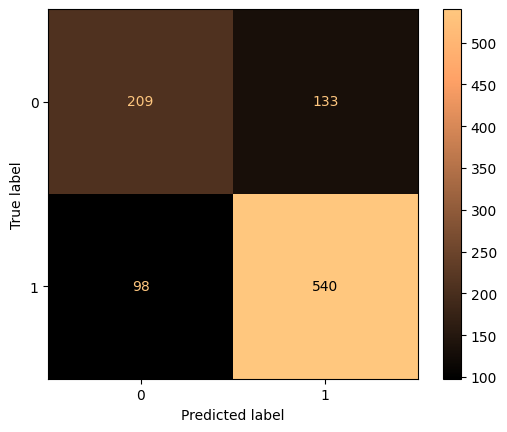

In [19]:
#Test the performance of the model on the highest performing F1 value model (KNN = 1NN)
#get the network again, give it the test data instead of validation data
def KNN_model_best(x,y,N,x_val,y_val,display):
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=N)
    model.fit(x,y)
    #Test model on validation data
    sklearn.neighbors.KNeighborsClassifier(n_neighbors = N)
    prediction = model.predict(x_val)
    true = y_val
    acc = (sklearn.metrics.accuracy_score(true,prediction))
    precision = (sklearn.metrics.precision_score(true,prediction))
    recall = (sklearn.metrics.recall_score(true,prediction))
    f1 = (sklearn.metrics.f1_score(true,prediction))
    cm = sklearn.metrics.confusion_matrix(true,prediction,labels=model.classes_)
    print("Confusion Matrix Values")
    print(cm)
    disp = sklearn.metrics.ConfusionMatrixDisplay(cm,display_labels=model.classes_)
    #displaynetwork
    if display:
       disp.plot(cmap='copper')
    #store the values to an array, Accuracy, Precision, Recall, F1
    Performance = [acc,precision,recall,f1]
    return Performance
# KNN using 1 neighbor
KNN1_bestmodel = KNN_model_best(X_train_z,Y_train_z,1,X_test_z,Y_test_z,True)
results_Best_model = pd.DataFrame([KNN1_bestmodel],['1NN'],['Accuracy','Precision','Recall','F1'])
print(f"\nPerformance of the best network using the test data:\n")
print(results_Best_model)
print(f"\nConfusion Matrix Values by Type:\n")
print(f"True Positive (TP) = 540")
print(f"True Negative (TN) = 209")
print(f"False Positive (FP) = 133")
print(f"False Negative (FN) = 98")